In [107]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import keras
import os
import numpy as np
import cv2
import numpy
import matplotlib.pyplot as plt
import skimage
import csv
from skimage import data

In [108]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

images, labels = load_data("/Users/uliakaliberda/PycharmProjects/StartingNN/BlgClsf/Training")

In [109]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [110]:
images_test, labels_test = load_data("/Users/uliakaliberda/PycharmProjects/StartingNN/BlgClsf/Testing")

In [111]:
def createModel():
    model = Sequential()
    model.add(Conv2D(100, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(100, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

<class 'numpy.ndarray'>


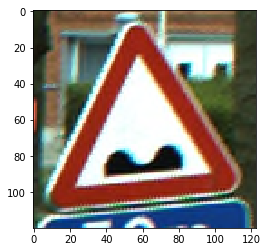

In [112]:
plt.imshow(images[1])
print(type(images[1]))

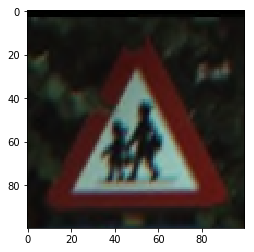

In [113]:
resized_image = cv2.resize(images[200], (100, 100)) 
plt.imshow(resized_image)

In [114]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (100, 100)) 
    

In [115]:
for i in range(len(images_test)):
    images_test[i] = cv2.resize(images_test[i], (100, 100)) 

In [116]:
images = np.asarray(images).reshape(len(images), 100, 100, 3)
images_test = np.asarray(images_test).reshape(len(images_test), 100, 100, 3)
print(images.shape)

(4575, 100, 100, 3)


In [117]:
print(labels[:30])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [118]:
nClasses = 62
input_shape = (100,100,3)
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 100, 100, 100)     2800      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 98, 98, 100)       90100     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 49, 49, 100)       0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 49, 49, 64)        57664     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 23, 23, 64)        0         
__________

In [119]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [124]:
batch_size = 800
epochs = 5
history = model.fit(images, labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle = True,
          validation_data=(images_test[:1000], labels_test[:1000]))

Train on 4575 samples, validate on 1000 samples
Epoch 1/5
4575/4575 [==============================] - 694s 152ms/step - loss: 0.3454 - acc: 0.9060 - val_loss: 0.4412 - val_acc: 0.8960
Epoch 2/5
4575/4575 [==============================] - 604s 132ms/step - loss: 0.2673 - acc: 0.9248 - val_loss: 0.3897 - val_acc: 0.9150
Epoch 3/5
4575/4575 [==============================] - 612s 134ms/step - loss: 0.2276 - acc: 0.9362 - val_loss: 0.3825 - val_acc: 0.9270
Epoch 4/5
4575/4575 [==============================] - 609s 133ms/step - loss: 0.1954 - acc: 0.9427 - val_loss: 0.3514 - val_acc: 0.9290
Epoch 5/5
4575/4575 [==============================] - 605s 132ms/step - loss: 0.1478 - acc: 0.9554 - val_loss: 0.3093 - val_acc: 0.9330


In [125]:
score = model.evaluate(images_test, labels_test, verbose=0)

In [126]:
print(score )

[0.22793569520755905, 0.9468253968253968]


Text(0.5,1,'Accuracy Curves')

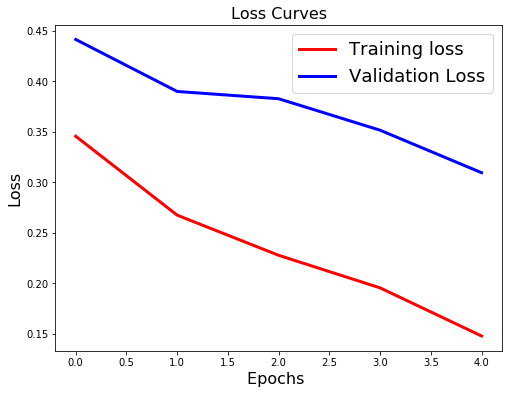

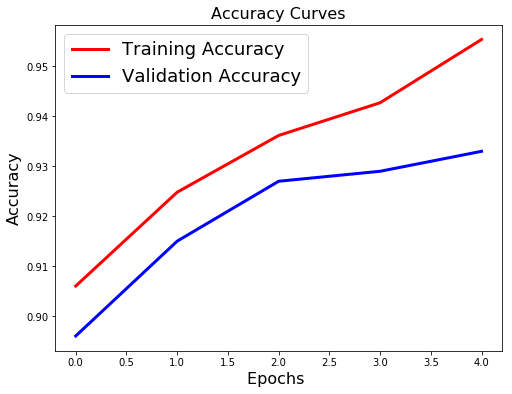

In [127]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)